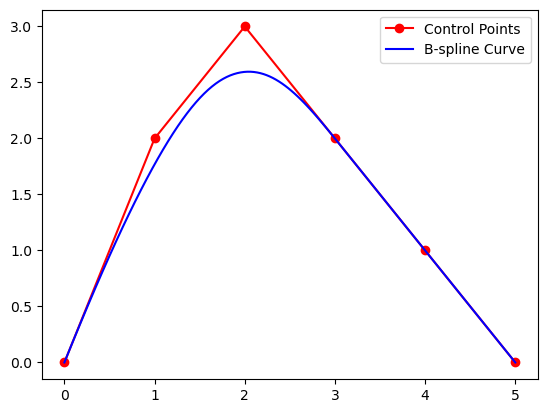

In [45]:
# source: https://www.mycompiler.io/view/8QbUs5XT86y

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_interp_spline

# Define control points
points = np.array([[0, 0], [1, 2], [2, 3], [3, 2], [4, 1], [5, 0]])

# Define degree of the B-spline curve
degree = 3

# Create a uniform knot vector
knots = np.concatenate((np.zeros(degree), np.linspace(0, 1, len(points) - degree + 1), np.ones(degree)))

# Create the B-spline
bspline = BSpline(knots, points, degree)

# Evaluate the B-spline at multiple points
t = np.linspace(0, 1, 100)
curve = bspline(t)

# Plot the control points and the B-spline curve
plt.figure()
plt.plot(points[:,0], points[:,1], 'ro-', label='Control Points')
plt.plot(curve[:,0], curve[:,1], 'b-', label='B-spline Curve')
plt.legend()
plt.show()

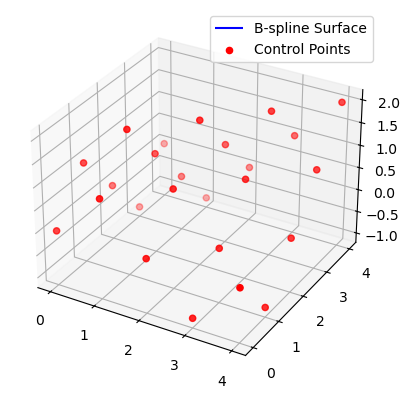

In [49]:
# Define control points grid of the format (x,y,z)
points = np.array([
    [0, 0, 0], [1, 0, 1], [2, 0, 0], [3, 0, -1], [4, 0, 0],
    [0, 1, 1], [1, 1, 2], [2, 1, 1], [3, 1, 0], [4, 1, -1],
    [0, 2, 0], [1, 2, 1], [2, 2, 2], [3, 2, 1], [4, 2, 0],
    [0, 3, -1], [1, 3, 0], [2, 3, 1], [3, 3, 2], [4, 3, 1],
    [0, 4, 0], [1, 4, -1], [2, 4, 0], [3, 4, 1], [4, 4, 2]
])

# Reshape control points into a grid
points = points.reshape(5, 5, 3)

# Define degree of the B-spline surface (both x and y -direction)
degree = 3

# Create a uniform knot vector for both u and v directions
knot_vector_u = np.concatenate((np.zeros(degree), np.linspace(0, 1, points.shape[0] - degree + 1), np.ones(degree)))
knot_vector_v = np.concatenate((np.zeros(degree), np.linspace(0, 1, points.shape[1] - degree + 1), np.ones(degree)))


# Create mesh grid for evaluation points
u = np.linspace(0, 1, 50)
v = np.linspace(0, 1, 50)
u, v = np.meshgrid(u, v)

# Initialize an array to hold the surface points
surface_points = np.zeros((u.shape[0], u.shape[1], 3))

# Evaluate the B-spline surface at each (u, v) pair
for i in range(u.shape[0]):
    for j in range(u.shape[1]):
        surface_points[i, j] = np.sum([
            np.outer(
                BSpline.basis_element(knot_vector_u[i:i + degree + 1], extrapolate=False)(u[i, j]),
                BSpline.basis_element(knot_vector_v[j:j + degree + 1], extrapolate=False)(v[i, j])
            )[:, :, np.newaxis] * points[i, j, :]
            for i in range(points.shape[0]) for j in range(points.shape[1])
        ], axis=0)

# Extract the x, y, z coordinates
X = surface_points[:, :, 0]
Y = surface_points[:, :, 1]
Z = surface_points[:, :, 2]

# Plot the control points and the B-spline surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, color='b', label='B-spline Surface')
ax.scatter(points[:, :, 0], points[:, :, 1], points[:, :, 2], color='r', label='Control Points')
ax.legend()
plt.show()

In [54]:
i=3
len(knot_vector_u[i:i + degree + 1])


4